#**Project: Emotion Detection Using Machine Learning**

##**Introduction**

###Emotion detection is a crucial task in Natural Language Processing (NLP), allowing machines to understand and classify human emotions based on text input. In this project, I have build a machine learning model to classify text into different emotional categories. This is basically very useful for applications such as sentiment analysis, mental health monitoring, and customer feedback analysis.

##**Dataset Description**

###The dataset used for this project consists of textual data labeled with different emotions. The columns that are present in this dataset are:



*   text : This is the input text expressing an emotion.
*   label : This is a numerical representation of the emotion category.

###**Note:** The dataset is split into **training, testing, and validation sets** to ensure model generalization and prevent overfitting.

In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
import joblib
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

In [ ]:
!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
#Loading the data and Exploring it
train_df = pd.read_csv('/content/training.csv')
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


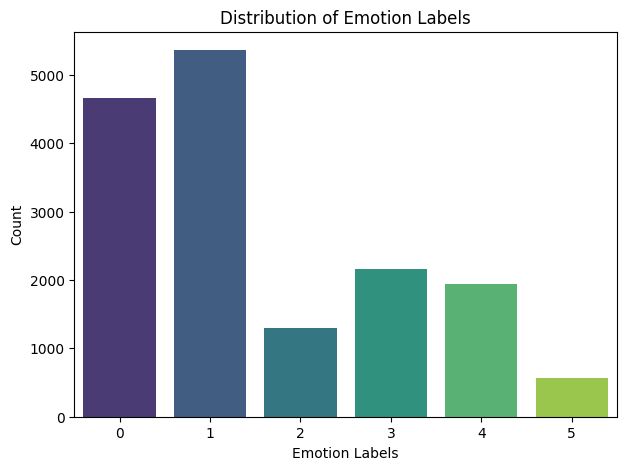

In [ ]:
# Checking the distribution of labels
plt.figure(figsize=(7,5))
sns.countplot(x=train_df['label'],palette="viridis")
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()

###**Data Preprocessing**

####We clean the text data by removing special characters and stopwords to improve the model performance.

In [ ]:
#Cleaning the text data
train_df['clean_text'] = train_df['text'].apply(nfx.remove_special_characters)
train_df['clean_text'] = train_df['clean_text'].apply(nfx.remove_stopwords)

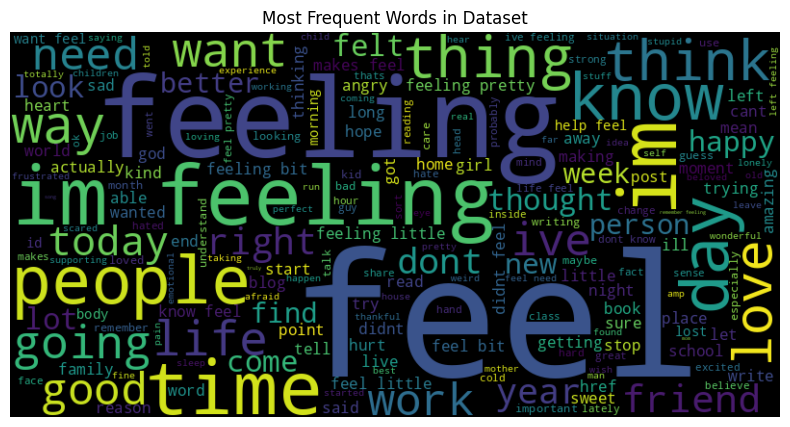

In [ ]:
#Generating a WordCloud of the most frequent words
text_combined = " ".join(train_df['clean_text'])
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(text_combined)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Dataset")
plt.show()

##**Feature Engineering**

####We use **TF-IDF vectorization** to convert text into numerical format for machine learning algorithms.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['label']

###**Splitting the data**

####We will split the dataset into **80% training and 20% testing**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

###**Model Training & Evaluation**

####We train multiple models and select the best-performing one.

In [ ]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "Support Vector Machine": SVC(kernel='linear')
}

best_model = None
best_accuracy = 0

for name, model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"{name} Accuracy:{accuracy}")
  print(classification_report(y_test,y_pred))

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model

Naive Bayes Accuracy:0.6659375
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       946
           1       0.60      0.98      0.75      1021
           2       1.00      0.05      0.09       296
           3       0.92      0.31      0.47       427
           4       0.94      0.24      0.39       397
           5       0.00      0.00      0.00       113

    accuracy                           0.67      3200
   macro avg       0.69      0.42      0.41      3200
weighted avg       0.73      0.67      0.59      3200

Logistic Regression Accuracy:0.855625
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       946
           1       0.80      0.97      0.87      1021
           2       0.89      0.58      0.70       296
           3       0.90      0.80      0.85       427
           4       0.86      0.75      0.80       397
           5       0.87      0.46      0.60       113

    accu

###**Confusion Matrix**

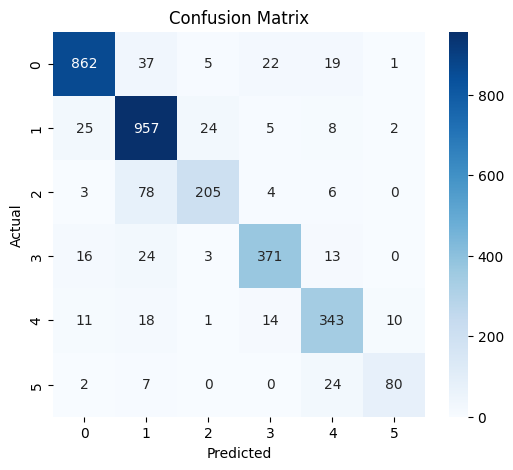

In [ ]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test,best_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###**Saving the best performing Model For Future Prediction**

In [ ]:
joblib.dump(best_model,"best_emotion_model.pkl")
joblib.dump(vectorizer,"vectorizer.pkl")

['vectorizer.pkl']

###**Making Predictions**

In [ ]:
def predict_emotion(text):
  text_cleaned = nfx.remove_special_characters(text)
  text_cleaned = nfx.remove_stopwords(text_cleaned)
  text_vectorized = vectorizer.transform([text_cleaned])
  return best_model.predict(text_vectorized)[0]

In [ ]:
#Making Prediction for random Example
print(predict_emotion("Now I want rest today!"))

1


##**Conclusion**

###This project successfully implements **emotion detection** using machine learning algorithms. By cleaning and vectorizing text data, I have also visualized that:

* *Empotion Label Distribution*

* *WordCloud of Maximum time coming words*

* *Confusion Matrix for Performance Evaluation*

###This model can be used for real-world applications and sentiment analysis.

##**Deployment Process**

In [27]:
!pip install streamlit joblib neattext pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [32]:
!ngrok authtoken 2uX8Zf5GLJ2c9Ix3Kk2ujsAq3yL_4dRSau5SUg8WVRewMGBtg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [36]:
#Creating a python Script (app.py)
%%writefile app.py
import streamlit as st
import joblib
import neattext.functions as nfx

#Load the saved model and vectorizer
model = joblib.load("best_emotion_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

#Emotion Mapping (Adjust labels as per data)
emotion_mapping = {
    0: "Sad 😢",
    1: "Happy 😊",
    2: "Angry 😡",
    3: "Surprised 😲",
    4: "Fearful 😨",
    5: "Neutral 😐"
}

#Emotion Prediction Function
def predict_emotion(text):
  text_cleaned = nfx.remove_special_characters(text)
  text_cleaned = nfx.remove_stopwords(text_cleaned)
  text_vectorized = vectorizer.transform([text_cleaned])
  prediction = model.predict(text_vectorized)[0]
  return emotion_mapping.get(prediction,"Unknow Emotion🤔 ")

#Streamlit UI
st.set_page_config(page_title="Emotion Detector",page_icon="🎭")
st.title("Emotion Detection App 🎭")
st.subheader("Analyze the emotion behind your text using AI !")
st.write("Simply enter a sentence, and the model will predict the emotion behind it.")

user_input = st.text_area("Enter your text here:","")

#Button
if st.button("Predict Emotion"):
  if user_input:
    emotion = predict_emotion(user_input)
    st.success(f"The Predicted Emotion is: **{emotion}**")
  else:
    st.warning("Please enter some text!")

#Footer
st.markdown("-----")
st.markdown("**Made with ❤️ by Amisha Mishra**")

Overwriting app.py


In [37]:
!streamlit run app.py &>/dev/null &

In [39]:
from pyngrok import ngrok

# Replace with the actual public URL of the tunnel you want to disconnect
tunnel_to_disconnect = "https://e1af-34-123-456.ngrok-free.app"

ngrok.disconnect(tunnel_to_disconnect)

In [47]:
from pyngrok import ngrok

# Get a list of active tunnels
tunnels = ngrok.get_tunnels()

# Disconnect each active tunnel
for tunnel in tunnels:
    ngrok.disconnect(tunnel.public_url)
    print(f"Disconnected tunnel: {tunnel.public_url}")

Disconnected tunnel: https://e1af-34-48-36-125.ngrok-free.app
Disconnected tunnel: https://c87e-34-48-36-125.ngrok-free.app
Disconnected tunnel: https://71a0-34-48-36-125.ngrok-free.app


In [48]:
!pkill -f streamlit

In [49]:
# 3. Start your Streamlit app:
!streamlit run app.py &>/dev/null &

# 4. Connect to ngrok (only after starting Streamlit):
public_url = ngrok.connect(addr="8501", proto="http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://945d-34-48-36-125.ngrok-free.app" -> "http://localhost:8501"
